In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("credit card.csv")

In [3]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [12]:
df = df.rename(columns = {'default.payment.next.month' : 'payment'})

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'payment'],
      dtype='object')

In [14]:
x = df.drop(['ID', 'payment'], axis = 1)

In [15]:
y = df[['payment']]

In [16]:
x.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1      0  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2      0  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3      0  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4      0  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0       0.0  
1    1000.0    1000.0       0.0    2000.0  
2    1000.0    1000.0    1000.0    5000.0  
3    1200.0    1100.0    1069.0    1000.0  
4   10000.0    9000.0     689.0     679.0  

[5 rows x 23 columns]

In [17]:
y.head()

payment
0        1
1        1
2        0
3        0
4        0

In [18]:
y.value_counts()

payment
0          23364
1           6636
dtype: int64

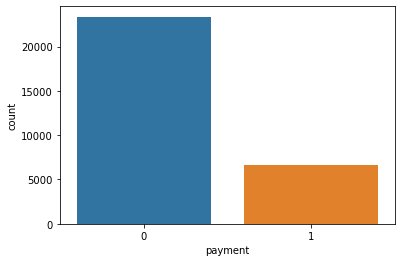

In [21]:
sns.countplot(x = 'payment', data = df);

### Handling Imbalanced Data

In [22]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)

In [23]:
x_new, y_new = sm.fit_resample(x, y)

In [25]:
x_new.shape

(45482, 23)

In [26]:
y_new.shape

(45482, 1)

In [27]:
y_new.value_counts()

payment
0          22741
1          22741
dtype: int64

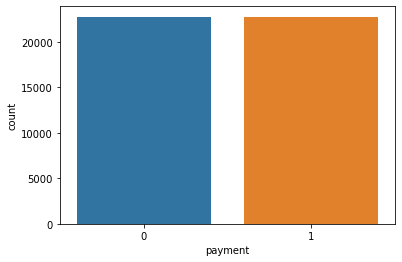

In [29]:
sns.countplot(x = 'payment', data = y_new);

# Feature Engineering

### Extra Tree Classifier

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier()

In [32]:
extra_clf.fit(x, y)

ExtraTreesClassifier()

In [34]:
feature_importance = extra_clf.feature_importances_

In [35]:
feature_importance

array([0.06532426, 0.01045261, 0.03358121, 0.02116781, 0.0671228 ,
       0.09317869, 0.04810073, 0.03824842, 0.02914746, 0.0277916 ,
       0.03179979, 0.05049151, 0.04646368, 0.04497231, 0.044697  ,
       0.04375527, 0.04461471, 0.0444379 , 0.04215054, 0.04238896,
       0.04111498, 0.04246666, 0.04653109])

In [37]:
imp = pd.DataFrame(feature_importance, columns = ['gain_score'])

In [38]:
imp 

gain_score
0     0.065324
1     0.010453
2     0.033581
3     0.021168
4     0.067123
5     0.093179
6     0.048101
7     0.038248
8     0.029147
9     0.027792
10    0.031800
11    0.050492
12    0.046464
13    0.044972
14    0.044697
15    0.043755
16    0.044615
17    0.044438
18    0.042151
19    0.042389
20    0.041115
21    0.042467
22    0.046531

In [39]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [40]:
cols = pd.DataFrame(x.columns, columns = ['feature_names'])

In [45]:
gains = pd.concat([cols, imp], axis=1)

In [46]:
gains

feature_names  gain_score
0      LIMIT_BAL    0.065324
1            SEX    0.010453
2      EDUCATION    0.033581
3       MARRIAGE    0.021168
4            AGE    0.067123
5          PAY_0    0.093179
6          PAY_2    0.048101
7          PAY_3    0.038248
8          PAY_4    0.029147
9          PAY_5    0.027792
10         PAY_6    0.031800
11     BILL_AMT1    0.050492
12     BILL_AMT2    0.046464
13     BILL_AMT3    0.044972
14     BILL_AMT4    0.044697
15     BILL_AMT5    0.043755
16     BILL_AMT6    0.044615
17      PAY_AMT1    0.044438
18      PAY_AMT2    0.042151
19      PAY_AMT3    0.042389
20      PAY_AMT4    0.041115
21      PAY_AMT5    0.042467
22      PAY_AMT6    0.046531

In [47]:
gains.nlargest(15, 'gain_score')

feature_names  gain_score
5          PAY_0    0.093179
4            AGE    0.067123
0      LIMIT_BAL    0.065324
11     BILL_AMT1    0.050492
6          PAY_2    0.048101
22      PAY_AMT6    0.046531
12     BILL_AMT2    0.046464
13     BILL_AMT3    0.044972
14     BILL_AMT4    0.044697
16     BILL_AMT6    0.044615
17      PAY_AMT1    0.044438
15     BILL_AMT5    0.043755
21      PAY_AMT5    0.042467
19      PAY_AMT3    0.042389
18      PAY_AMT2    0.042151

In [54]:
# Sort all with respect to gain_score
gains.nlargest(gains.shape[0], 'gain_score')

feature_names  gain_score
5          PAY_0    0.093179
4            AGE    0.067123
0      LIMIT_BAL    0.065324
11     BILL_AMT1    0.050492
6          PAY_2    0.048101
22      PAY_AMT6    0.046531
12     BILL_AMT2    0.046464
13     BILL_AMT3    0.044972
14     BILL_AMT4    0.044697
16     BILL_AMT6    0.044615
17      PAY_AMT1    0.044438
15     BILL_AMT5    0.043755
21      PAY_AMT5    0.042467
19      PAY_AMT3    0.042389
18      PAY_AMT2    0.042151
20      PAY_AMT4    0.041115
7          PAY_3    0.038248
2      EDUCATION    0.033581
10         PAY_6    0.031800
8          PAY_4    0.029147
9          PAY_5    0.027792
3       MARRIAGE    0.021168
1            SEX    0.010453

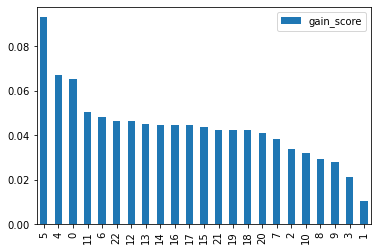

In [68]:
gains_all = gains.nlargest(gains.shape[0], 'gain_score')

# plotting
gains_all.plot(kind='bar');

<AxesSubplot:>

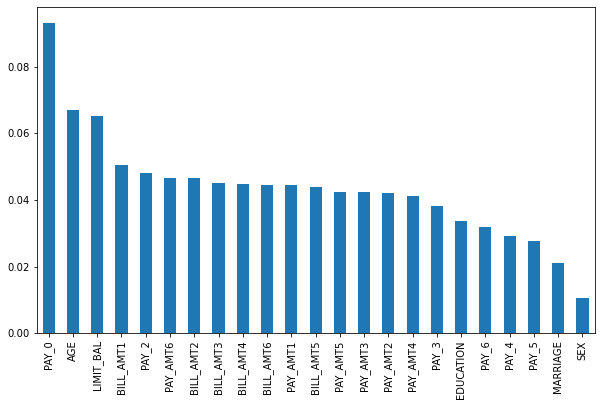

In [69]:
features = pd.Series(feature_importance, index = x.columns)
plt.figure(figsize= (10,6));
features.nlargest(features.shape[0]).plot(kind = 'bar')

In [70]:
x.corr()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.031183   0.018749 -0.021602  0.054283  0.189859   
BILL_AMT3   0.283236 -0.024563   0.013002 -0.024909  0.053710  0.179785   
BILL_AMT4   0.293988 -0.021880  -0.000451 -0.023344  0.051353  0.179125   
BILL_AMT5   0.295562 -0.017005  -0.007567 -0.025393  0.049345  0.180635   
BILL_AMT6   0.290389 -0.016733  -0.009099 -0.021207  0.047613  0.176980   
PAY_AMT1    0.195236 -0.000242  -0.037456 -0.005979  0.026147 -0.079269   
PAY_AMT2    0.178408 -0.001391  -0.030038 -0.008093  0.021785 -0.070101   
PAY_AMT3    0.210167 -0.008597  -0.039943 -0.003541  0.029247 -0.070561   
PAY_AMT4    0.203242 -0.002229  -0.038218 -0.012659  0.021379 -0.064005   
PAY_AMT5    0.217202 -0.001667  -0.040358 -0.001205  0.022850 -0.058190   
PAY_AMT6    0.219595 -0.002766  -0.037200 -0.006641  0.019478 -0.058673   

              PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL -0.296382 -0.286123 -0.267460 -0.249411  ...   0.283236   0.293988   
SEX       -0.070771 -0.066096 -0.060173 -0.055064  ...  -0.024563  -0.021880   
EDUCATION  0.121566  0.114025  0.108793  0.097520  ...   0.013002  -0.000451   
MARRIAGE   0.024199  0.032688  0.033122  0.035629  ...  -0.024909  -0.023344   
AGE       -0.050148 -0.053048 -0.049722 -0.053826  ...   0.053710   0.051353   
PAY_0      0.672164  0.574245  0.538841  0.509426  ...   0.179785   0.179125   
PAY_2      1.000000  0.766552  0.662067  0.622780  ...   0.224146   0.222237   
PAY_3      0.766552  1.000000  0.777359  0.686775  ...   0.227494   0.227202   
PAY_4      0.662067  0.777359  1.000000  0.819835  ...   0.244983   0.245917   
PAY_5      0.622780  0.686775  0.819835  1.000000  ...   0.243335   0.271915   
PAY_6      0.575501  0.632684  0.716449  0.816900  ...   0.241181   0.266356   
BILL_AMT1  0.234887  0.208473  0.202812  0.206684  ...   0.892279   0.860272   
BILL_AMT2  0.235257  0.237295  0.225816  0.226913  ...   0.928326   0.892482   
BILL_AMT3  0.224146  0.227494  0.244983  0.243335  ...   1.000000   0.923969   
BILL_AMT4  0.222237  0.227202  0.245917  0.271915  ...   0.923969   1.000000   
BILL_AMT5  0.221348  0.225145  0.242902  0.269783  ...   0.883910   0.940134   
BILL_AMT6  0.219403  0.222327  0.239154  0.262509  ...   0.853320   0.900941   
PAY_AMT1  -0.080701  0.001295 -0.009362 -0.006089  ...   0.244335   0.233012   
PAY_AMT2  -0.058990 -0.066793 -0.001944 -0.003191  ...   0.316936   0.207564   
PAY_AMT3  -0.055901 -0.053311 -0.069235  0.009062  ...   0.130011   0.300023   
PAY_AMT4  -0.046858 -0.046067 -0.043461 -0.058299  ...   0.143405   0.130191   
PAY_AMT5  -0.037093 -0.035863 -0.033590 -0.033337  ...   0.179712   0.160433   
PAY_AMT6  -0.036500 -0.035861 -0.026565 -0.023027  ...   0.182326   0.177637   

           BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
LIMIT_BAL   0.295562   0.290389  0.195236  0.178408  0.210167  0.203242   
SEX        -0.017005  -0.016733 -0.000242 -0.001391 -0.008597 -0.002229   
EDUCATION  -0.007567  -0.009099 -0.037456 -0.030038 -0.039943 -0

<AxesSubplot:>

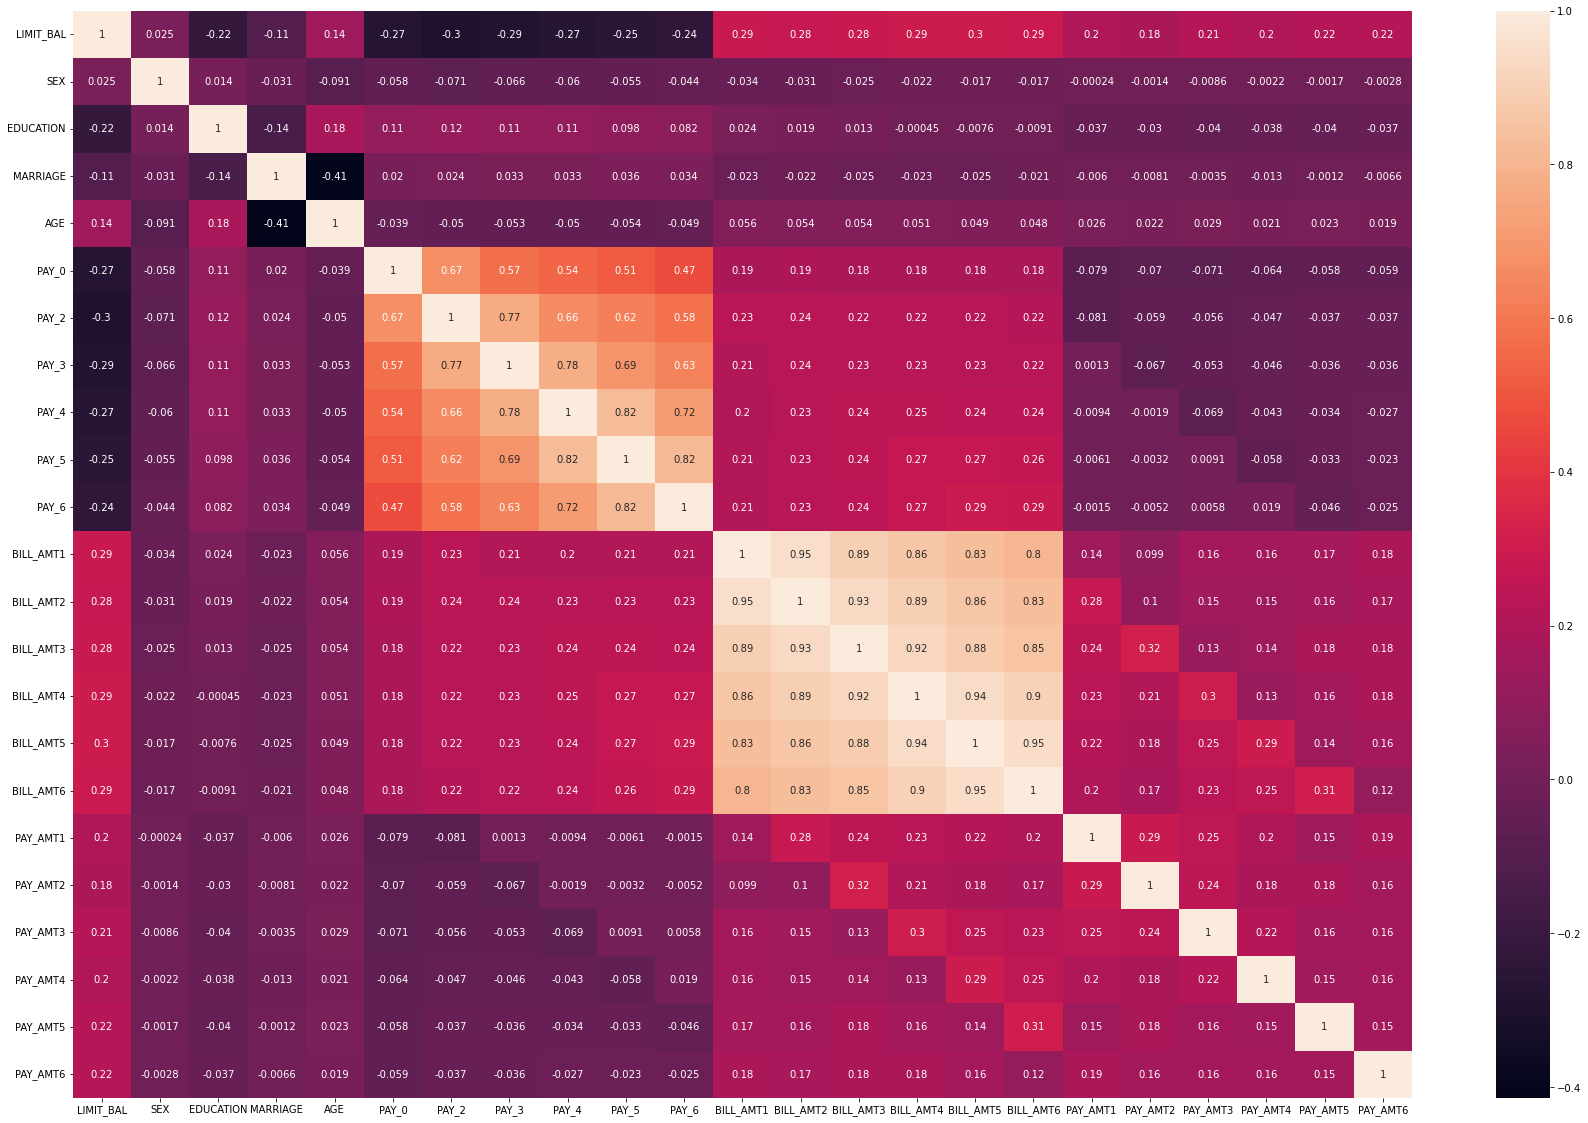

In [80]:
plt.figure(figsize = (30,20))
sns.heatmap(x.corr(), annot=True)

# Select K Best

In [81]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  payment  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [82]:
x.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1      0  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2      0  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3      0  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4      0  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0       0.0  
1    1000.0    1000.0       0.0    2000.0  
2    1000.0    1000.0    1000.0    5000.0  
3    1200.0    1100.0    1069.0    1000.0  
4   10000.0    9000.0     689.0     679.0  

[5 rows x 23 columns]

In [84]:
y.head()

payment
0        1
1        1
2        0
3        0
4        0

In [85]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [86]:
model = SelectKBest(score_func= f_classif)

In [87]:
feature_score = model.fit(x, y)

In [89]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [90]:
feature_scores = pd.DataFrame(feature_score.scores_, columns=['feature_score'])
feature_scores

feature_score
0      724.068539
1       47.978854
2       23.547112
3       17.781271
4        5.788556
5     3537.714970
6     2239.169136
7     1757.466444
8     1476.845967
9     1304.591176
10    1085.402485
11      11.580532
12       6.044238
13       5.944388
14       3.094745
15       1.371087
16       0.865820
17     160.403810
18     103.291524
19      95.218011
20      97.188000
21      91.429801
22      85.089045

In [91]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [93]:
features = pd.DataFrame(x.columns, columns = ['feature_names'])

In [94]:
features

feature_names
0      LIMIT_BAL
1            SEX
2      EDUCATION
3       MARRIAGE
4            AGE
5          PAY_0
6          PAY_2
7          PAY_3
8          PAY_4
9          PAY_5
10         PAY_6
11     BILL_AMT1
12     BILL_AMT2
13     BILL_AMT3
14     BILL_AMT4
15     BILL_AMT5
16     BILL_AMT6
17      PAY_AMT1
18      PAY_AMT2
19      PAY_AMT3
20      PAY_AMT4
21      PAY_AMT5
22      PAY_AMT6

In [96]:
scores = pd.concat([features, feature_scores], axis = 1)
scores

feature_names  feature_score
0      LIMIT_BAL     724.068539
1            SEX      47.978854
2      EDUCATION      23.547112
3       MARRIAGE      17.781271
4            AGE       5.788556
5          PAY_0    3537.714970
6          PAY_2    2239.169136
7          PAY_3    1757.466444
8          PAY_4    1476.845967
9          PAY_5    1304.591176
10         PAY_6    1085.402485
11     BILL_AMT1      11.580532
12     BILL_AMT2       6.044238
13     BILL_AMT3       5.944388
14     BILL_AMT4       3.094745
15     BILL_AMT5       1.371087
16     BILL_AMT6       0.865820
17      PAY_AMT1     160.403810
18      PAY_AMT2     103.291524
19      PAY_AMT3      95.218011
20      PAY_AMT4      97.188000
21      PAY_AMT5      91.429801
22      PAY_AMT6      85.089045

# PCA - Principal Component Analysis

In [98]:
# first of all, we need scalling our data
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
scaled_x = min_max.fit_transform(x)

In [100]:
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [101]:
scaled_x.shape

(30000, 23)

In [102]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
x_pca = pca.fit_transform(scaled_x)

In [103]:
x_pca

array([[-0.40423245, -0.00800476, -0.00259672],
       [-0.39188881,  0.209224  , -0.19698761],
       [-0.39264215,  0.08409527, -0.12656656],
       ...,
       [ 0.62351265,  0.33728837, -0.08489176],
       [ 0.60374479, -0.01953156,  0.21421106],
       [ 0.60917214,  0.0099741 ,  0.23321987]])

In [104]:
features = pd.DataFrame(x_pca, columns = ['pca1', 'pca2', 'pca3'])

In [105]:
features

pca1      pca2      pca3
0     -0.404232 -0.008005 -0.002597
1     -0.391889  0.209224 -0.196988
2     -0.392642  0.084095 -0.126567
3     -0.394038  0.068885  0.154030
4      0.610813 -0.089679  0.334445
...         ...       ...       ...
29995  0.605245  0.027127  0.231678
29996  0.601275 -0.132858 -0.028314
29997  0.623513  0.337288 -0.084892
29998  0.603745 -0.019532  0.214211
29999  0.609172  0.009974  0.233220

[30000 rows x 3 columns]

In [108]:
import plotly.express as pl
pl.scatter_3d(features, x = 'pca1', y = 'pca2', z = 'pca3', color = 'pca1')